<a href="https://colab.research.google.com/github/IlhamThrq/AI_TI-1B_2025/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Tengah Semester – Kecerdasan Buatan
## Analisis Data Airbnb New York City 2019

### Data ini terdiri dari 48.895 baris dan 16 kolom yang mencakup informasi aktivitas listing seperti lokasi, harga, ulasan, dan ketersediaan. Tujuan utama dari analisis ini adalah:
  - Mengenali karakteristik properti di NYC.
  - Menemukan pola menarik dari perilaku penyewaan.
  - Memberikan insight berdasarkan data secara visual dan statistik.


## 1. Import Library

In [20]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Setting Visual

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

## 2. Load Dataset

In [21]:
# Load Dataset

df = pd.read_csv('airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 3. Ekspolorasi Data awal

In [28]:
# Informasi umum dataset
print(df.info())

# Ukuran data
print(f"\nJumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

# Cek missing value
print("\nMissing values per kolom:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 48656 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48656 non-null  int64   
 1   name                            48656 non-null  object  
 2   host_id                         48656 non-null  int64   
 3   host_name                       48656 non-null  object  
 4   neighbourhood_group             48656 non-null  object  
 5   neighbourhood                   48656 non-null  object  
 6   latitude                        48656 non-null  float64 
 7   longitude                       48656 non-null  float64 
 8   room_type                       48656 non-null  object  
 9   price                           48656 non-null  int64   
 10  minimum_nights                  48656 non-null  int64   
 11  number_of_reviews               48656 non-null  int64   
 12  last_review            

## 4.Data Cleaning

In [37]:
# Menge-cek duplikat jika ada
print("Jumlah duplikat:", df.duplicated().sum())

# Menghilangkan duplikat jika ada
df = df.drop_duplicates()

# Meng-isi nilai kosong pada kolom 'reviews_per_month' dengan 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Meng-isi kolom nama host dan nama listing yang kosong dengan "unknown"
df['name'] = df['name'].fillna("unknown")
df['host_name'] = df['host_name'].fillna("unknown")

# Hapus kolom yang terlalu banyak missing value jika perlu
missing_pct = df.isnull().sum() / len(df)
df.isnull().sum()

Jumlah duplikat: 0


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## 5. Data Maniulation

In [47]:
# Salin data yang harga <= 1000 untuk visualisasi saja, bukan menghapus
df_vis = df[df['price'] <= 1000].copy()

# Operasi lanjutan dilakukan hanya pada df_vis
df_vis['avg_price_group'] = df_vis.groupby('neighbourhood_group')['price'].transform('mean')
df_vis['price_deviation'] = df_vis['price'] - df_vis['avg_price_group']

df_vis['kategori_harga'] = pd.cut(df_vis['price'], bins=[0, 100, 200, 500, 1000],
                                  labels=['Murah', 'Menengah', 'Premium', 'Luxury'])

df_vis['aktivitas'] = pd.cut(df_vis['number_of_reviews'], bins=[-1, 0, 50, 200, 1000],
                              labels=['Tidak Aktif', 'Kurang Aktif', 'Aktif', 'Sangat Aktif'])

df_vis[['price', 'avg_price_group', 'price_deviation', 'kategori_harga', 'aktivitas']].head()

,price,avg_price_group,price_deviation,kategori_harga,aktivitas
0,149,117.807930,31.192070,Menengah,Kurang Aktif
1,225,178.936293,46.063707,Premium,Kurang Aktif
2,150,178.936293,-28.936293,Menengah,Tidak Aktif
3,89,117.807930,-28.807930,Murah,Sangat Aktif
4,80,178.936293,-98.936293,Murah,Kurang Aktif


## 6. Visualisasi Data setelah cleaning dan manipulation data

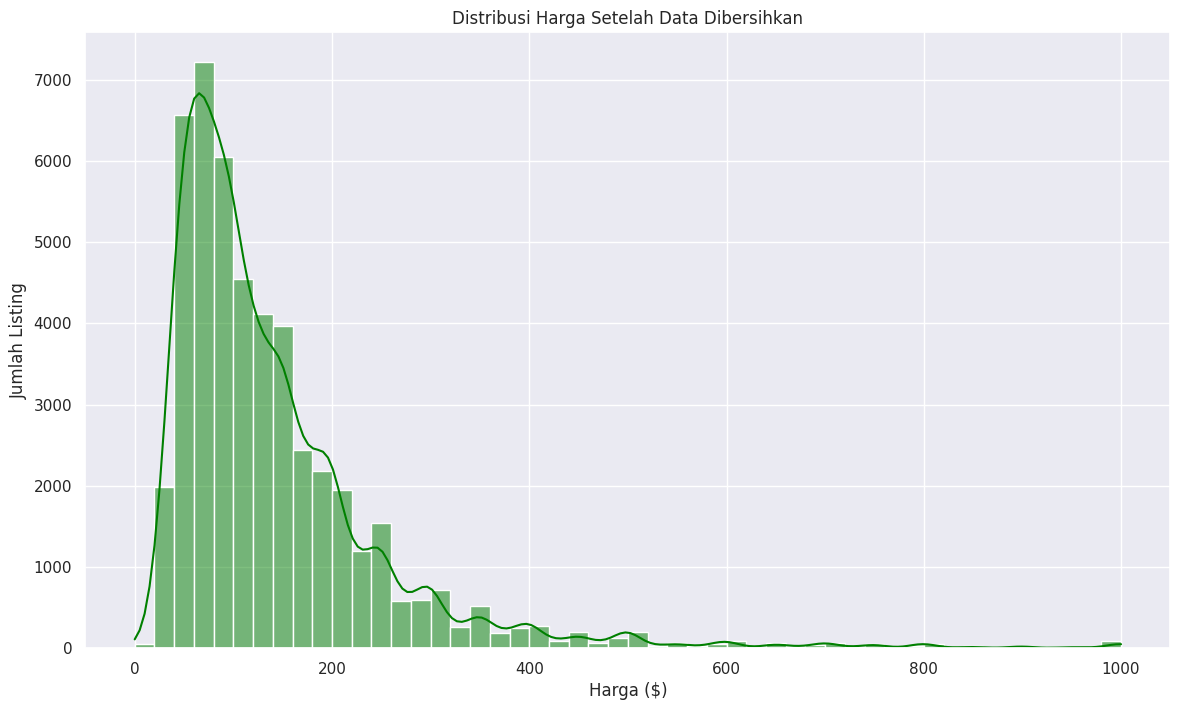

In [56]:
# 6.1 Distribusi Harga
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title("Distribusi Harga Setelah Data Dibersihkan")
plt.xlabel("Harga ($)")
plt.ylabel("Jumlah Listing")
plt.show()

<ipython-input-49-11efc0995e6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='Set2')


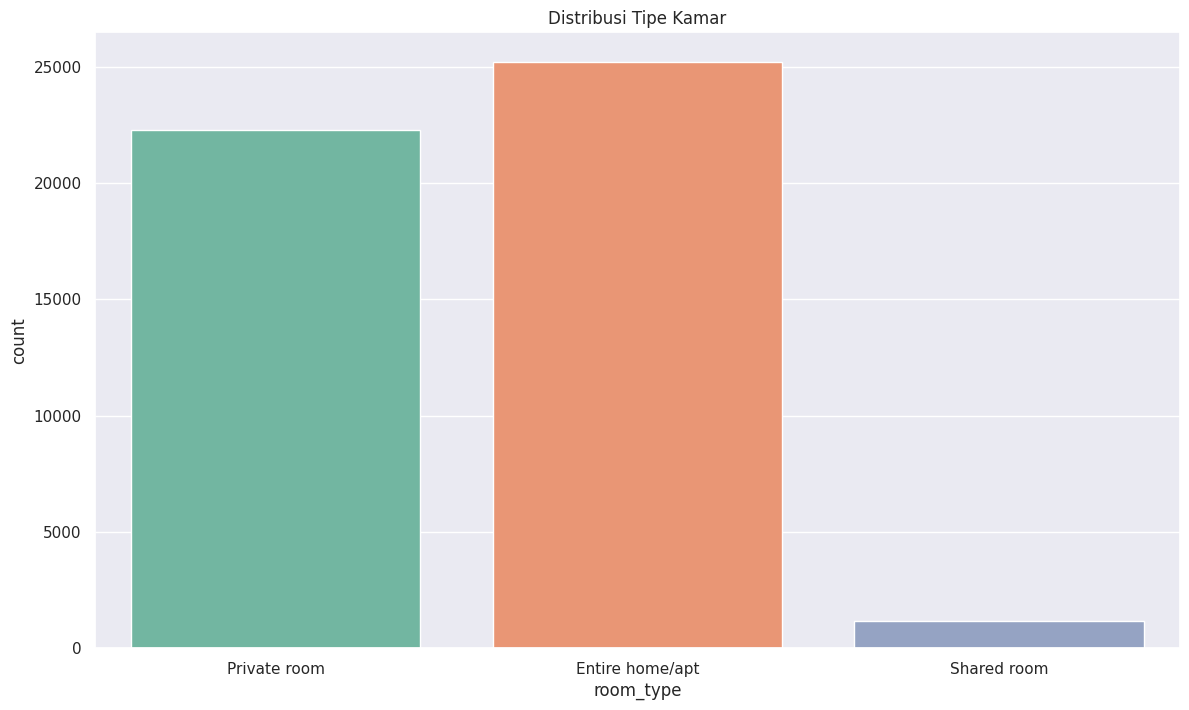

In [49]:
# 6.2 Tipe Kamar
sns.countplot(data=df, x='room_type', palette='Set2')
plt.title("Distribusi Tipe Kamar")
plt.show()

<ipython-input-50-5fa6320825cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='pastel')


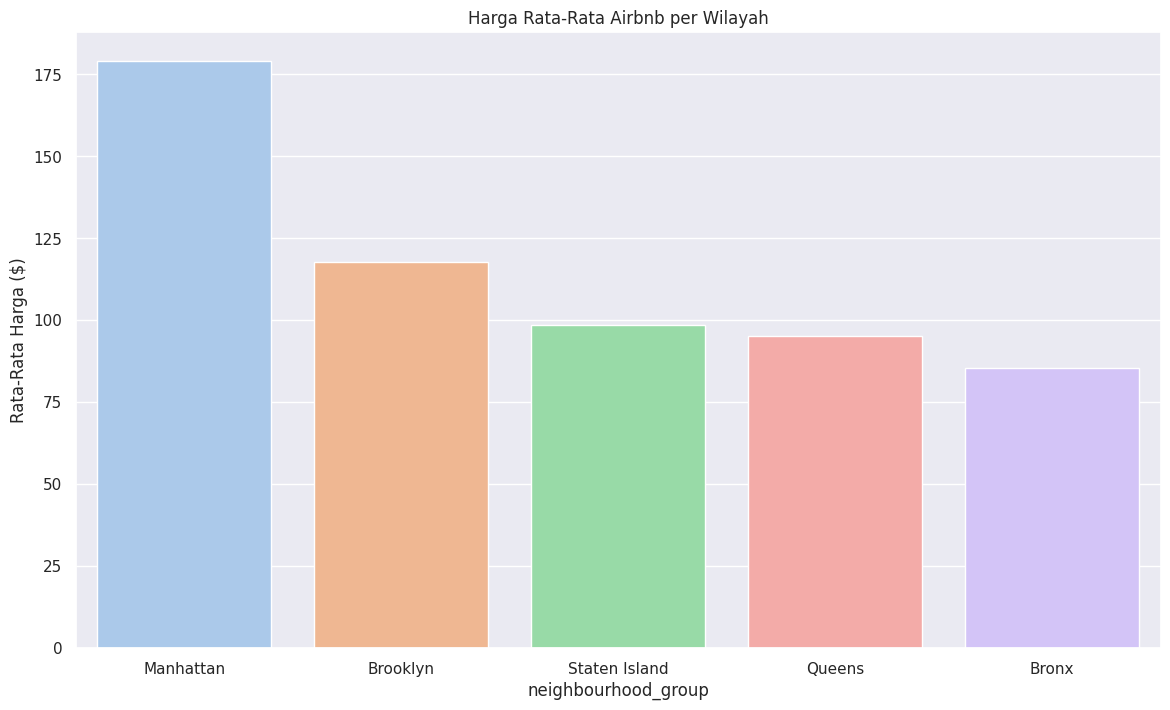

In [50]:
# 6.3 Harga Rata-Rata per wilayah
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values, palette='pastel')
plt.title("Harga Rata-Rata Airbnb per Wilayah")
plt.ylabel("Rata-Rata Harga ($)")
plt.show()

<ipython-input-51-8a89eb0fc3d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='kategori_harga', palette='coolwarm')


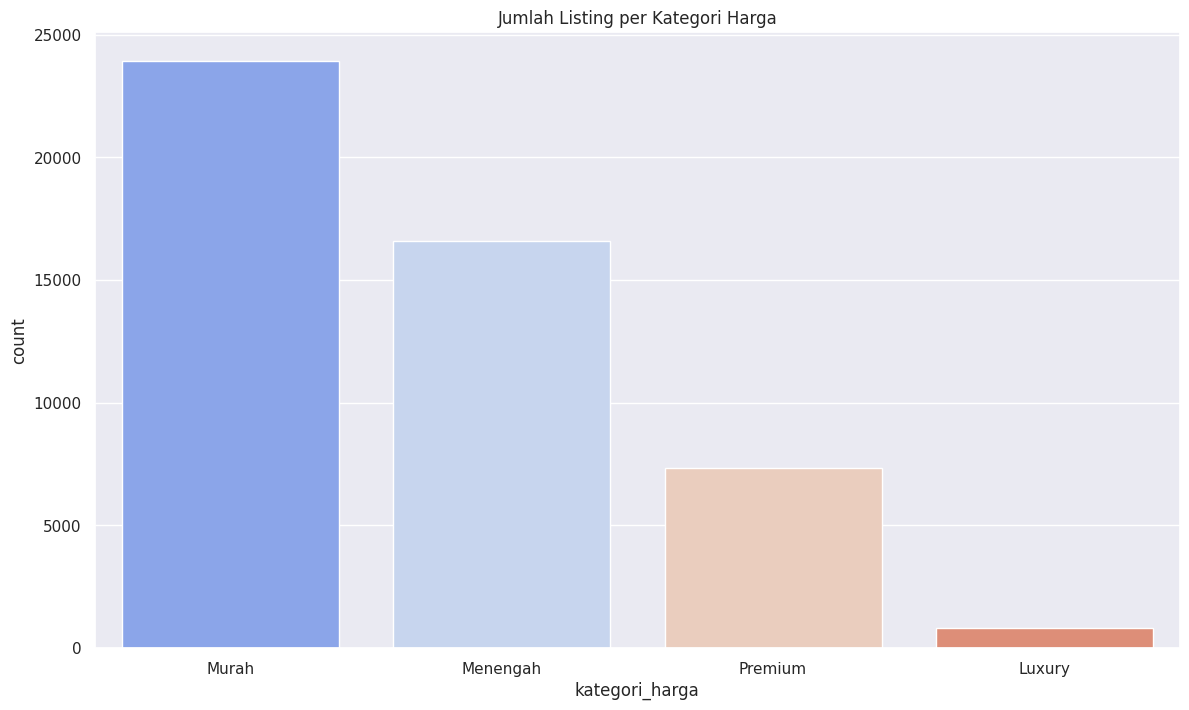

In [51]:
# 6.4 Katageri Harga
sns.countplot(data=df, x='kategori_harga', palette='coolwarm')
plt.title("Jumlah Listing per Kategori Harga")
plt.show()

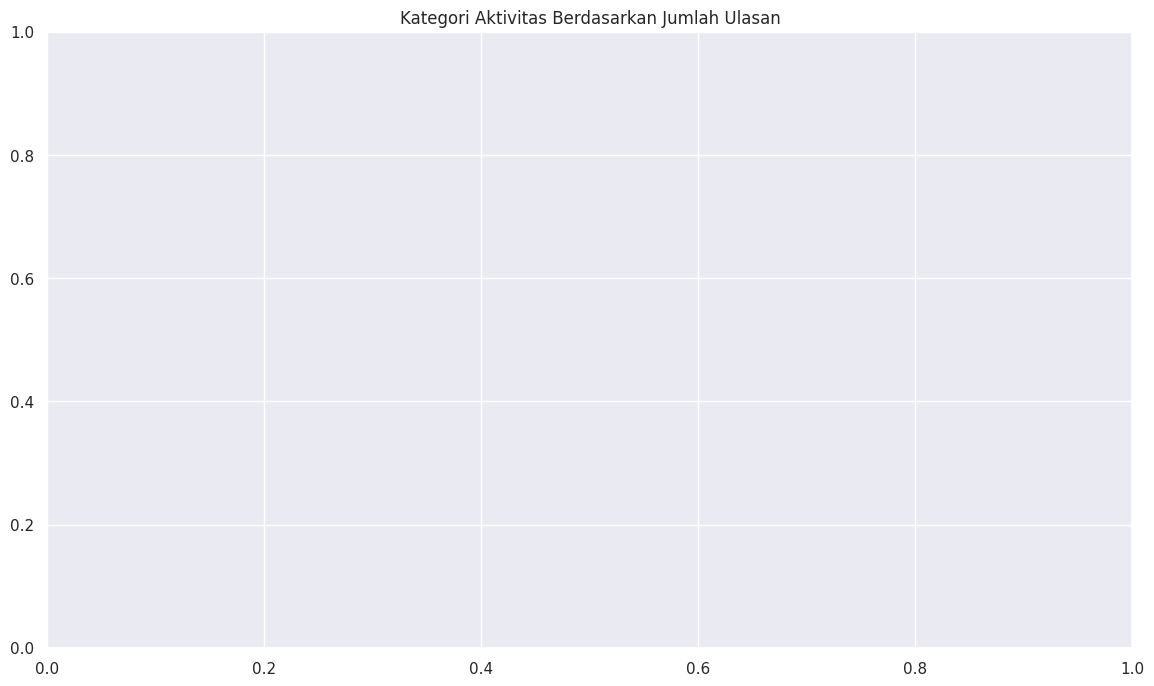

In [52]:
# 6.5 sns.countplot(data=df, x='aktivitas', palette='Blues')
plt.title("Kategori Aktivitas Berdasarkan Jumlah Ulasan")
plt.show()